### Spotify Sonic Cluster Analysis

In [1]:
# import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
from matplotlib.colors import LinearSegmentedColormap

# set plotting params
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Montserrat', 'Gotham', 'Arial', 'Helvetica']

# spotify-inspired colors
colors = ["#282828", "#1DB954"]
spotify_cmap = LinearSegmentedColormap.from_list("spotify", colors)

In [3]:
df = pd.read_csv('most_streamed_2023.csv', encoding='latin-1')
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [4]:
# feature selection - columns to keep
cols_to_keep = ['track_name', 'artist(s)_name', 'streams', 'in_spotify_playlists', 'in_spotify_charts', 'bpm', 'key', 'mode',
                'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

# create clean copy
df = df[cols_to_keep].copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   streams               953 non-null    object
 3   in_spotify_playlists  953 non-null    int64 
 4   in_spotify_charts     953 non-null    int64 
 5   bpm                   953 non-null    int64 
 6   key                   858 non-null    object
 7   mode                  953 non-null    object
 8   danceability_%        953 non-null    int64 
 9   valence_%             953 non-null    int64 
 10  energy_%              953 non-null    int64 
 11  acousticness_%        953 non-null    int64 
 12  instrumentalness_%    953 non-null    int64 
 13  liveness_%            953 non-null    int64 
 14  speechiness_%         953 non-null    int64 
dtypes: int64(10), object(5)
memory usage: 11

We notice that `streams` is an `object` column but we need it to be `numeric`.

In [5]:
df['streams'] = pd.to_numeric(df['streams'].str.replace(',', ''), errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            953 non-null    object 
 1   artist(s)_name        953 non-null    object 
 2   streams               952 non-null    float64
 3   in_spotify_playlists  953 non-null    int64  
 4   in_spotify_charts     953 non-null    int64  
 5   bpm                   953 non-null    int64  
 6   key                   858 non-null    object 
 7   mode                  953 non-null    object 
 8   danceability_%        953 non-null    int64  
 9   valence_%             953 non-null    int64  
 10  energy_%              953 non-null    int64  
 11  acousticness_%        953 non-null    int64  
 12  instrumentalness_%    953 non-null    int64  
 13  liveness_%            953 non-null    int64  
 14  speechiness_%         953 non-null    int64  
dtypes: float64(1), int64(10

We notice that `streams` and `key` have missing values. Since these columns are crucial to the rest of the analysis, we will drop them.

In [6]:
# handle missing values
df = df.dropna(subset=['streams', 'key']).reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            857 non-null    object 
 1   artist(s)_name        857 non-null    object 
 2   streams               857 non-null    float64
 3   in_spotify_playlists  857 non-null    int64  
 4   in_spotify_charts     857 non-null    int64  
 5   bpm                   857 non-null    int64  
 6   key                   857 non-null    object 
 7   mode                  857 non-null    object 
 8   danceability_%        857 non-null    int64  
 9   valence_%             857 non-null    int64  
 10  energy_%              857 non-null    int64  
 11  acousticness_%        857 non-null    int64  
 12  instrumentalness_%    857 non-null    int64  
 13  liveness_%            857 non-null    int64  
 14  speechiness_%         857 non-null    int64  
dtypes: float64(1), int64(10

In [7]:
df['key'].unique()

array(['B', 'C#', 'F', 'A', 'D', 'F#', 'G#', 'G', 'E', 'A#', 'D#'],
      dtype=object)

In [8]:
df['mode'].unique()

array(['Major', 'Minor'], dtype=object)

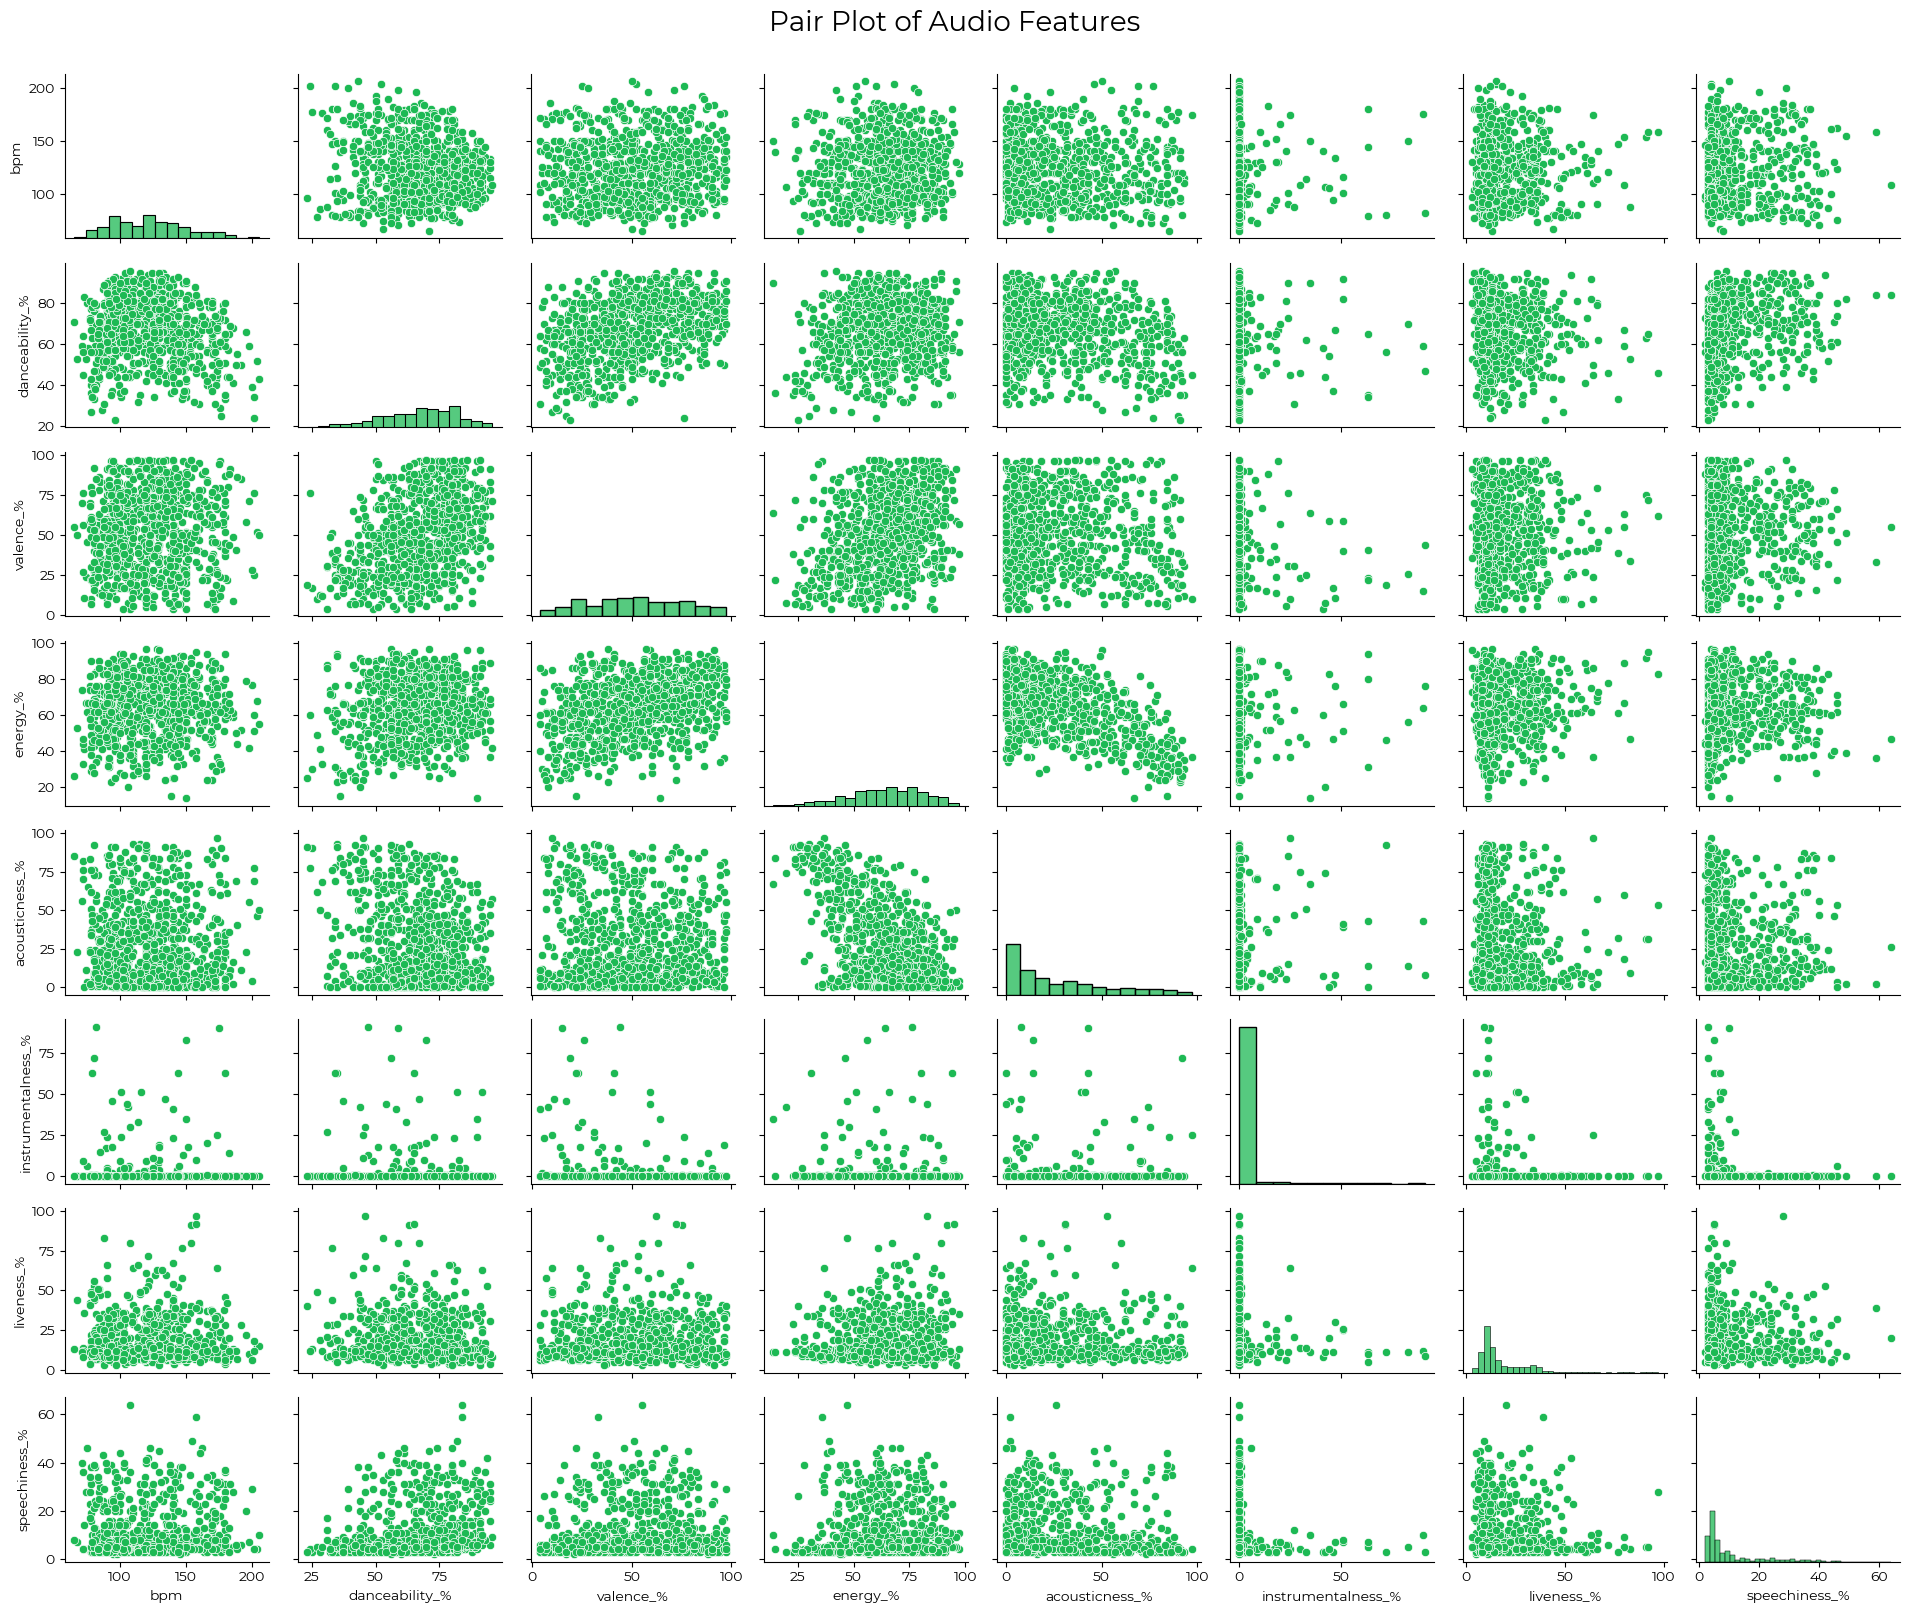

In [9]:
g = sns.pairplot(df[['bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 
                     'liveness_%', 'speechiness_%']], height=2, aspect=1.2,
                     plot_kws={'color': colors[1]}, diag_kws={'color': colors[1]})
g.fig.suptitle('Pair Plot of Audio Features', y=1.005, fontsize=20)
plt.tight_layout()
plt.show()

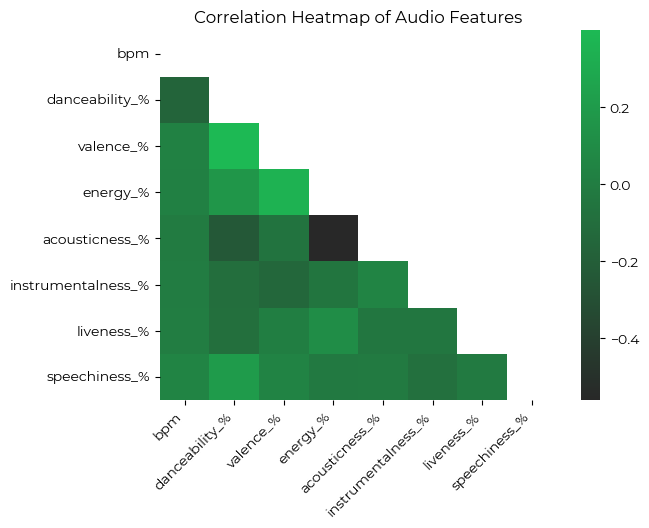

In [10]:
fig, ax = plt.subplots()
corr = df[['bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 
           'instrumentalness_%', 'liveness_%', 'speechiness_%']].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, ax=ax, cmap=spotify_cmap)
ax.set_title('Correlation Heatmap of Audio Features')
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

In [11]:
df['instrumentalness_%'].describe()

count    857.000000
mean       1.611435
std        8.570734
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       91.000000
Name: instrumentalness_%, dtype: float64

`instrumentalness_%` is highly skewed with majority of the tracks having a value of 0.

In [12]:
print(f'final dataset shape: {df.shape}')

final dataset shape: (857, 15)


### Phase 1: PCA & K-Means

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from kneed import KneeLocator

In [14]:
df2 = df.copy()
kmeans_features = ['bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 
                   'instrumentalness_%', 'liveness_%', 'speechiness_%']

df2[kmeans_features] = df2[kmeans_features].astype(float)

In [15]:
# baseline clustering
scaler = StandardScaler()
features_scaled_baseline = scaler.fit_transform(df2[kmeans_features])

To ensure numerical stability during the dimensionality reduction phase, full SVD solver was used to avoid iterative approximation errors encountered with randomized solvers that were prone to overflow issues.

In [16]:
# cumulative variance / scree plot
def scree_plot_cumulative(features, explained_var):
    '''plot cumulative variance and find min number of components to explain x% variance'''
    pca = PCA(svd_solver='full')
    pca.fit(features)
    cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

    # plot
    plt.figure(figsize=(10, 4))
    plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.title('Scree Plot (Cumulative Variance)')
    plt.grid(True)
    plt.axhline(y=explained_var, color='r', label='Eigenvalue = 1')
    plt.legend()
    plt.show()

    # determine number of components for x% variance
    n_components_x = np.argmax(cumulative_variance >= explained_var) + 1
    print(f'Number of components to explain {int(explained_var*100)}% variance: {n_components_x}')

    return pca, n_components_x

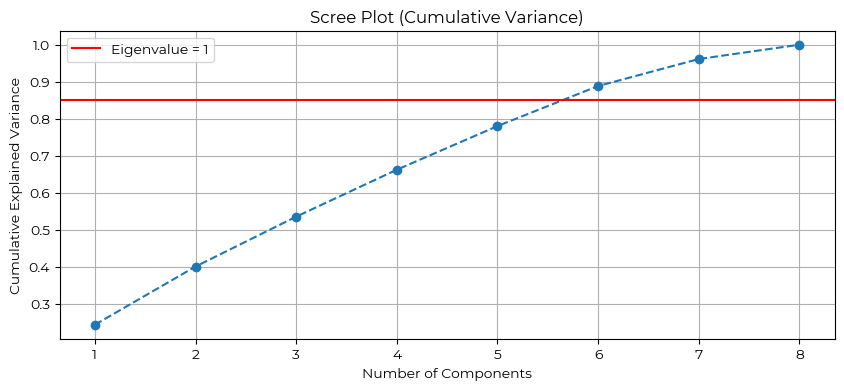

Number of components to explain 85% variance: 6


In [17]:
# baseline dimensionaliy reduction
pca_baseline, n_components_baseline = scree_plot_cumulative(features_scaled_baseline, 0.85)

In [18]:
# 2-PC plot
def plot_first_two_comp(pca, features):
    '''plots data projected on first 2 principal components'''
    # 2-component PCA
    features_pca_2d = pca.fit_transform(features)[:, :2]
    df_pca_2d = pd.DataFrame(features_pca_2d, columns=['PC1', 'PC2'])

    plt.figure(figsize=(10, 4))
    plt.scatter(df_pca_2d['PC1'], df_pca_2d['PC2'], color=colors[1], alpha=.7)
    plt.title('Data Projected onto First 2 Components')
    plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% Variance)')
    plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% Variance)')
    plt.grid(True)
    plt.show()

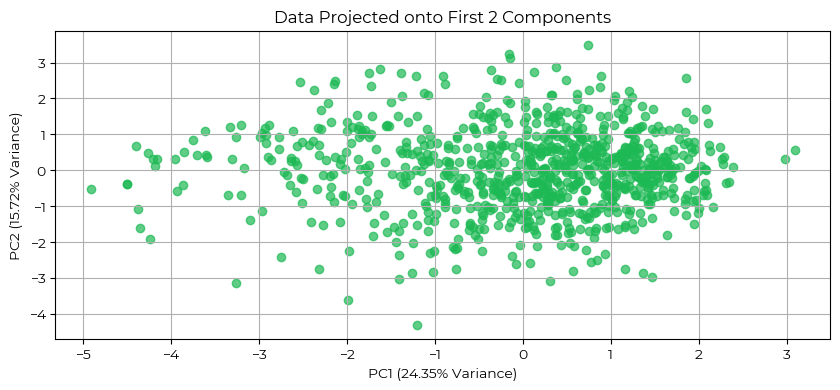

In [19]:
plot_first_two_comp(pca_baseline, features_scaled_baseline)

In [20]:
# elbow method to identify optimal k for clustering
def find_optimal_k(pca, features, n_components):
    '''use elbow method to identify optimal k for clustering by finding point of diminishing returns'''
    inertia = []
    k_range = range(1, 11)

    # transform features into first n components
    features_pca = pca.fit_transform(features)[:, :n_components]

    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=RuntimeWarning)

        for k in k_range:
            kmeans = KMeans(n_clusters=k, random_state=42, n_init=50, max_iter=500)
            kmeans.fit(features_pca)
            inertia.append(kmeans.inertia_)

    kneedle = KneeLocator(k_range, inertia, curve='convex', direction='decreasing')
    optimal_k = kneedle.elbow
    print(f'Optimal number of clusters (k): {optimal_k}')

    plt.figure(figsize=(10, 4))
    plt.plot(k_range, inertia, marker='o', linestyle='--')
    plt.axvline(optimal_k, linestyle='-', color='r')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
    plt.title('Elbow Plot for Optimal K')
    plt.grid(True)
    plt.show()

    return optimal_k, features_pca

Optimal number of clusters (k): 5


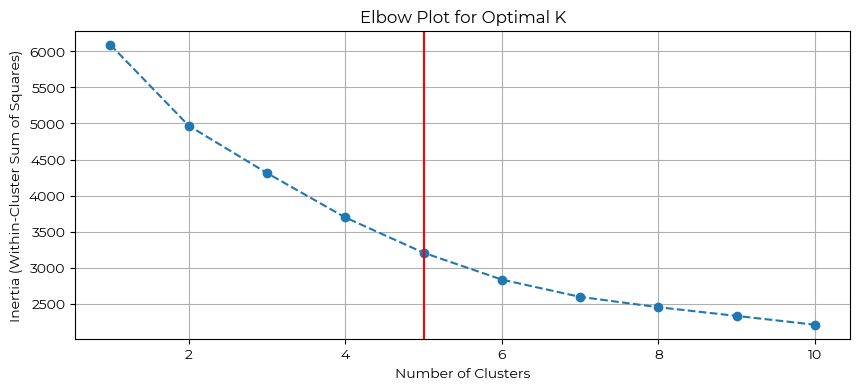

In [21]:
optimal_k_baseline, features_pca_baseline = find_optimal_k(pca_baseline, features_scaled_baseline, n_components_baseline)

In [22]:
df_kmeans_baseline = df2.copy()

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=RuntimeWarning)
    kmeans_baseline = KMeans(n_clusters=optimal_k_baseline, random_state=42, n_init=50, max_iter=500)
    df_kmeans_baseline['cluster'] = kmeans_baseline.fit_predict(features_pca_baseline)

df_kmeans_baseline['cluster'].value_counts()

cluster
4    322
2    230
3    161
0    128
1     16
Name: count, dtype: int64

We notice that there's a small cluster of 16 songs which suggests that the model could be overfitting to the extreme values present in `instrumentalness_%`.

As identified in the EDA, there's high skew in `instrumentalness_%` with most values at `0`, so we consider applying a log transform + clipping to address overfitting.

In [23]:
# iterative refinement: handling skew in instrumentalness_%
# log transform + clipping
df2['instrumentalness_%'] = np.log1p(df2['instrumentalness_%'])

scaler = StandardScaler()
features_scaled_transformed = scaler.fit_transform(df2[kmeans_features])
features_scaled_transformed = np.clip(features_scaled_transformed, -3, 3)

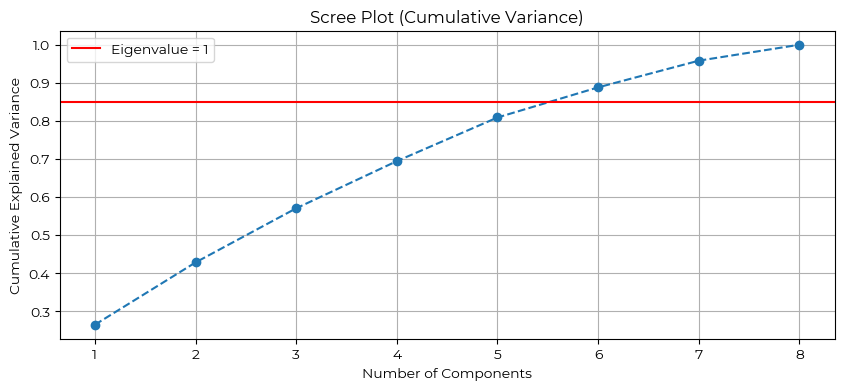

Number of components to explain 85% variance: 6


In [24]:
pca_transformed, n_components_transformed = scree_plot_cumulative(features_scaled_transformed, 0.85)

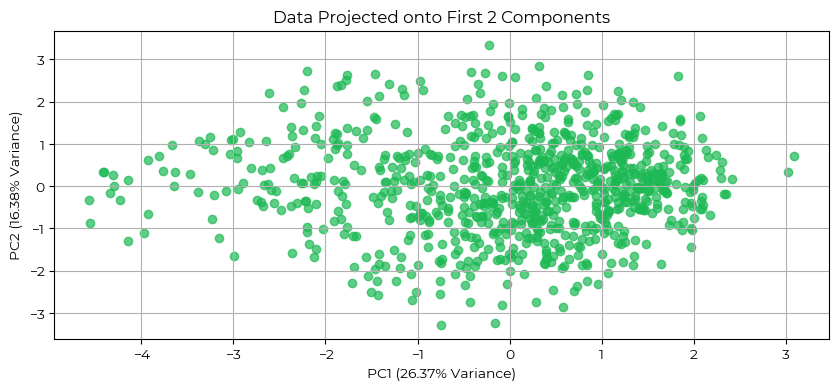

In [25]:
plot_first_two_comp(pca_transformed, features_scaled_transformed)

Optimal number of clusters (k): 4


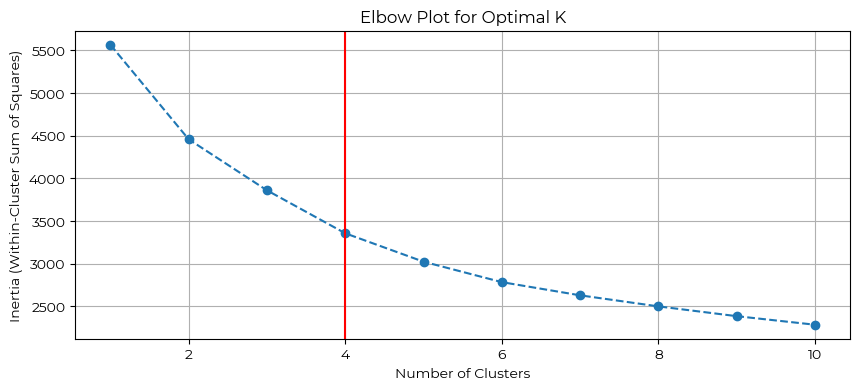

In [26]:
optimal_k_transformed, features_pca_transformed = find_optimal_k(pca_transformed, features_scaled_transformed, n_components_transformed)

In [27]:
df_kmeans_transformed = df2.copy()

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=RuntimeWarning)
    kmeans_transformed = KMeans(n_clusters=optimal_k_transformed, random_state=42, n_init=50, max_iter=500)
    df_kmeans_transformed['cluster'] = kmeans_transformed.fit_predict(features_pca_transformed)

df_kmeans_transformed['cluster'].value_counts()

cluster
1    314
0    255
3    157
2    131
Name: count, dtype: int64

Since the clusters produced by the method using transformed values were more balanced ranging between 130-315 data points per cluster, moving forward we will use the transformed results because they are more generalized.

In [28]:
# analyze loadings
loadings = pd.DataFrame(pca_transformed.components_.T[:, :2], columns=['PC1', 'PC2'], 
                        index=['bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 
                               'instrumentalness_%', 'liveness_%', 'speechiness_%'])

print('Top 3 features contributing to PC1 (positive):')
top_pc1_pos = loadings['PC1'].sort_values(ascending=False).head(3)
for var_name, val in top_pc1_pos.items():
    print(f'{var_name}: {val:.4f}')

print('\nTop 3 features contributing to PC1 (negative):')
top_pc1_neg = loadings['PC1'].sort_values(ascending=False).tail(3)
for var_name, val in top_pc1_neg.items():
    print(f'{var_name}: {val:.4f}')

print('\nTop 3 features contributing to PC2 (positive):')
top_pc2_pos = loadings['PC2'].sort_values(ascending=False).head(3)
for var_name, val in top_pc2_pos.items():
    print(f'{var_name}: {val:.4f}')

print('\nTop 3 features contributing to PC2 (negative):')
top_pc2_neg = loadings['PC2'].sort_values(ascending=False).tail(3)
for var_name, val in top_pc2_neg.items():
    print(f'{var_name}: {val:.4f}')

Top 3 features contributing to PC1 (positive):
energy_%: 0.5573
danceability_%: 0.4578
valence_%: 0.4554

Top 3 features contributing to PC1 (negative):
bpm: -0.0424
instrumentalness_%: -0.1021
acousticness_%: -0.4962

Top 3 features contributing to PC2 (positive):
danceability_%: 0.5167
acousticness_%: 0.4130
speechiness_%: 0.3918

Top 3 features contributing to PC2 (negative):
liveness_%: -0.2534
bpm: -0.3286
energy_%: -0.3886


We can characterize the following PCs:

**PC1: Sonic Intensity & Positivity**
- PC1+: Happy, loud, made for movement/dance
- PC1-: Quiet, more unplugged/acoustic

**PC2: Vocal-Focus vs Production-Style**
- PC2+: Vocal-heavy, rhythmic
- PC2-: Live sound (concert-style), high energy

In [29]:
cluster_profiles = df_kmeans_transformed.groupby('cluster')[kmeans_features].mean()

display(cluster_profiles)

,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
cluster,,,,,,,,
0,129.098039,59.764706,35.098039,68.278431,11.337255,0.327185,20.749020,6.368627
1,117.796178,76.636943,70.993631,72.073248,19.764331,0.081860,17.538217,7.117834
2,126.442748,74.129771,52.488550,63.068702,25.717557,0.033823,16.748092,30.610687
3,119.770701,55.019108,36.796178,43.535032,66.038217,0.358363,16.458599,6.630573


##### Cluster Analysis

**Cluster 0**: Pulsating - High-Octane Pop/EDM
- **Data Signal**: Highest BPM (129), lowest acousticness (11%), highest liveness (21%)
- **Description**: Fast-moving, likely songs designed for stadiums, concerts, possibly high crowd noise.

**Cluster 1**: High-Energy Anthems - Mood-Lifters/Party-Starters
- **Data Signal**: Highest danceability (77%), highest valence (71%), highest energy (72%)
- **Description**: High valence indicates "happiness", high energy/danceability suggests postitive, feel-good tracks, likely bringing excitement every time it comes on.

**Cluster 2**: Rhythmic Lyricists
- **Data Signal**: Highest speechiness (31%) vs average (<10%)
- **Description**: This cluster isolates songs where vocal delivery is rhythmic and word-heavy. The near-zero instrumentalness suggests tracks favor (percussive) vocals over melodic instrumentation.

**Cluster 3**: Chill & Reflective - Introspective/Aacoustic (Ballads & Ambient)
- **Data Signal**: Lowest danceability (55%), lowest energy (44%), highest acousticness (66%), highest instrumentalness (36%)
- **Description**: Low danceability and energy scores point toward slower, more emotional tracks. This cluster also absorbed most of the instrument-heavy tracks, possibly suggesting soothingness/comfort/relatability.

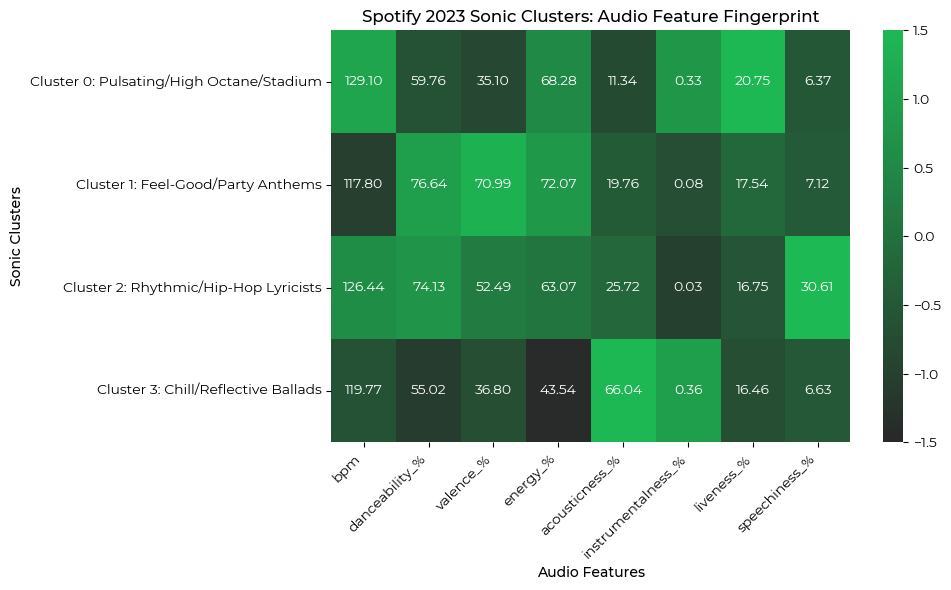

In [30]:
# visualize "dna" of clusters
df_heatmap = df_kmeans_transformed.groupby('cluster')[kmeans_features].mean()
df_heatmap.index = ['Cluster 0: Pulsating/High Octane/Stadium',
                    'Cluster 1: Feel-Good/Party Anthems',
                    'Cluster 2: Rhythmic/Hip-Hop Lyricists',
                    'Cluster 3: Chill/Reflective Ballads']

# make sure heatmap color intensity follows pca/kmeans values
df_heatmap_norm = (df_heatmap - df_heatmap.mean()) / df_heatmap.std()

lims = np.round(max(abs(df_heatmap_norm.min().min()), df_heatmap_norm.max().max()), 1)

plt.figure(figsize=(10, 6))
ax = sns.heatmap(df_heatmap_norm, annot=df_heatmap, fmt='.2f', cmap=spotify_cmap, 
                 vmin=-lims, vmax=lims)
plt.title('Spotify 2023 Sonic Clusters: Audio Feature Fingerprint', fontweight='medium')
plt.ylabel('Sonic Clusters', fontweight='medium')
plt.xlabel('Audio Features', fontweight='medium')
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
plt.tight_layout()
plt.show()

- Brighter green indicates the feature is significantly higher than dataset average
- Darker grey/black indicates the feature is significantly lower than dataset average

### Phase 2: Statistical Inference

Hypothesis: There is no relationship between cluster and music mode.

In [31]:
from scipy.stats import chi2_contingency

In [32]:
mode_piv = pd.crosstab(df_kmeans_transformed['cluster'], df_kmeans_transformed['mode'])
result = chi2_contingency(mode_piv)

print(f'p-value for cluster vs mode: {result.pvalue:.4f}')
display(mode_piv)

p-value for cluster vs mode: 0.0009


mode,Major,Minor
cluster,,
0,148,107
1,156,158
2,64,67
3,106,51


In [33]:
cluster_labels = ['Stadium Pulse', 'Feel-Good Party Anthems', 'Rhythmic Lyricists', 'Chill Ballads']

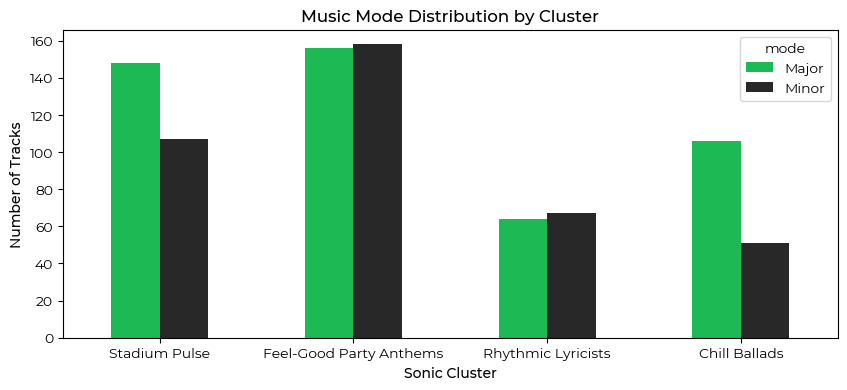

In [34]:
ax = mode_piv.plot(kind='bar', figsize=(10, 4), color=colors[::-1])
ax.set_xticklabels(cluster_labels)
plt.xticks(rotation=0)
plt.title('Music Mode Distribution by Cluster', fontweight='medium')
plt.ylabel('Number of Tracks', fontweight='medium')
plt.xlabel('Sonic Cluster', fontweight='medium')
plt.show()

We can also take a look at the songs that are most representative of each cluster.

In [35]:
from scipy.spatial.distance import cdist

In [36]:
centroids = kmeans_transformed.cluster_centers_

def get_representative_tracks(df, feature_matrix, centroids, optimal_k, n_songs=3):
    '''identifies top n tracks closest to cluster center (most representative)'''
    representative_songs = {}

    for i in range(optimal_k):
        cluster_indices = df[df['cluster']==i].index
        cluster_coords = feature_matrix[cluster_indices]
        distances = cdist(cluster_coords, [centroids[i]], metric='euclidean').flatten()

        # get top n songs with smallest distance
        closest_indices = cluster_indices[np.argsort(distances)[:n_songs]]
        representative_songs[f'cluster {i}'] = df.loc[closest_indices, ['track_name', 'artist(s)_name']]

    return representative_songs

# proper formatting to correct mojibake issues with help from spotify api search
format_map = {
    'Esqueï¿½ï¿½a-Me Se For C': 'Esqueça-Me Se For Capaz',
    'Marï¿½ï¿½lia Mendonï¿½ï¿½a': 'Marília Mendonça',
    'Maiara &': 'Maiara & Maraisa',
    'PLAYA DEL INGLï¿½': 'PLAYA DEL INGLÉS',
    'Beyoncï¿½': 'Beyoncé',
    'Malvadï¿½ï¿½': 'Malvadão 3',
    'Xamï¿½ï¿½': 'Xamã',
    'Neo B': 'Neo Beats'
}

representative_songs = get_representative_tracks(df_kmeans_transformed, features_pca_transformed, centroids, optimal_k_transformed)

# print results
for cluster, songs in representative_songs.items():
    print(f'\n{"-"*30} {cluster} {"-"*30}')
    print(songs.replace(format_map, regex=True).to_string(index=False))


------------------------------ cluster 0 ------------------------------
            track_name                           artist(s)_name
       ALIEN SUPERSTAR                                  Beyoncé
Crazy What Love Can Do David Guetta, Ella Henderson, Becky Hill
           Die For You                               The Weeknd

------------------------------ cluster 1 ------------------------------
             track_name                     artist(s)_name
Esqueça-Me Se For Capaz Marília Mendonça, Maiara & Maraisa
          Ojos Marrones                              Lasso
       PLAYA DEL INGLÉS               Myke Towers, Quevedo

------------------------------ cluster 2 ------------------------------
                             track_name                         artist(s)_name
                             Malvadão 3                Xamã, Gustah, Neo Beats
Trance (with Travis Scott & Young Thug) Travis Scott, Young Thug, Metro Boomin
                               Die Hard   Kendrick L

The $\chi^2$-test yielded a p-value was 0.0009 suggesting that we drop the null hypothesis and conclude that there is a statistically significant relationship between cluster and mode.

Notably, the Chill/Acoustic Ballad-Style Cluster 3 has approximately twice the number of tracks written in the major keys. This suggests that the ballads of 2023 lean toward harmonic stability of major scales, often associated with sentimental and resonant pop songwriting, such as those by Lewis Capaldi and One Direction.

### Phase 3: Success Predictive Modeling

We want to see if different sonic clusters (their characteristic audio features) help "boost" success (quantified by number of streams). We use a decision tree to see if audio features are able to differentiate / predict a "mega hit" vs a "standard hit". We quantify a "mega hit" as the top 10% of the 2023 most streamed dataset.

In [37]:
threshold = np.percentile(df_kmeans_transformed['streams'], 90)

df_classification = df_kmeans_transformed.copy()
df_classification['mega_hit'] = (df_classification['streams'] >= threshold).astype(int)

In [38]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

In [39]:
df_classification.columns

Index(['track_name', 'artist(s)_name', 'streams', 'in_spotify_playlists',
       'in_spotify_charts', 'bpm', 'key', 'mode', 'danceability_%',
       'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%',
       'liveness_%', 'speechiness_%', 'cluster', 'mega_hit'],
      dtype='object')

In [40]:
X = df_classification[['bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%',
                       'liveness_%', 'speechiness_%', 'cluster']]
y = df_classification['mega_hit']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y, test_size=0.2)

In [41]:
param_grid = {
    'max_depth': range(2, 11),
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf': [5, 10, 20] 
}

grid_search = GridSearchCV(
    DecisionTreeClassifier(class_weight='balanced', random_state=42),
    param_grid,
    cv=5, 
    scoring='f1'
)

grid_search.fit(X_train, y_train)

print(f'best params: {grid_search.best_params_}')
print(f'best score: {grid_search.best_score_:.2f}')

best_tree = grid_search.best_estimator_

best params: {'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 20}
best score: 0.20


In [42]:
def plot_importances(model, features, title):
    '''create horizontal bar plot for feature importances'''
    importances = pd.Series(model.feature_importances_, index=features)
    importances = importances[importances > 0].sort_values() # show non-zero
    plt.figure(figsize=(10, 4))
    ax = importances.plot(kind='barh', color=colors[1])
    # add labels to bars
    for i, v in enumerate(importances):
        ax.text(v + 0.002, i, f'{v:.2f}', va='center')
    plt.title(title)
    plt.xlabel('Importance')
    plt.show()

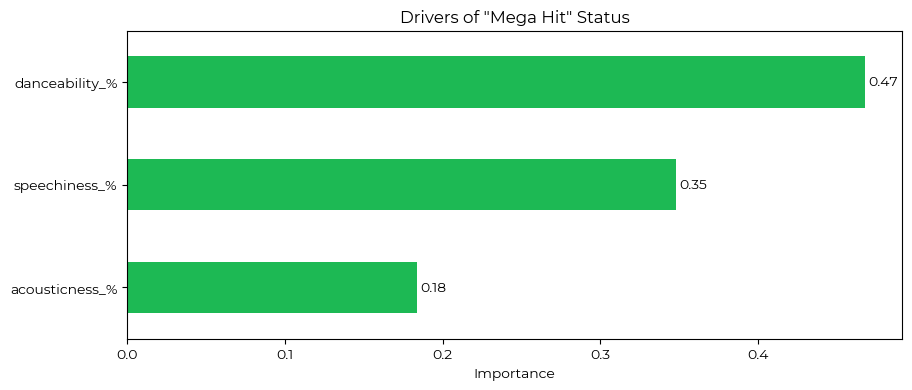

In [43]:
plot_importances(best_tree, X.columns, 'Drivers of "Mega Hit" Status')

In [44]:
X2 = df_classification[['bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%',
                       'liveness_%', 'speechiness_%', 'cluster', 'in_spotify_playlists', 'in_spotify_charts']]

X_train2, X_test2, y_train, y_test = train_test_split(X2, y, random_state=42, stratify=y, test_size=0.2)

best params: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 10}
best score: 0.70


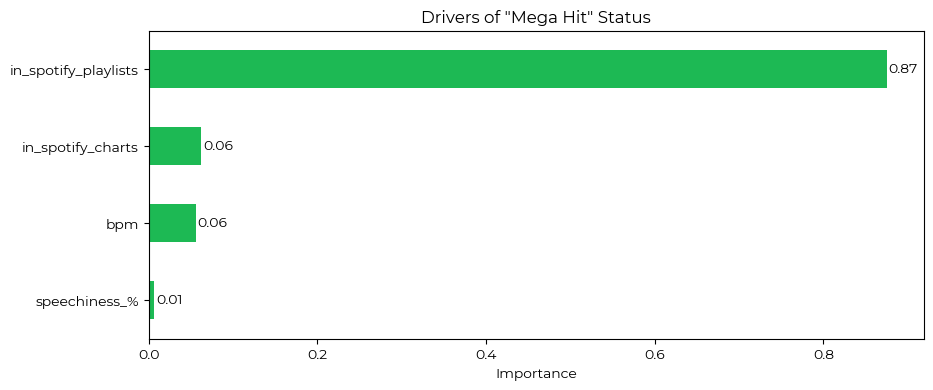

In [45]:
grid_search.fit(X_train2, y_train)

print(f'best params: {grid_search.best_params_}')
print(f'best score: {grid_search.best_score_:.2f}')

best_tree2 = grid_search.best_estimator_

plot_importances(best_tree2, X2.columns, 'Drivers of "Mega Hit" Status')

The inclusion of market reach variables (playlists/charts) improved the model's F1 score from 0.20 to 0.70, with `in_spotify_playlists` accounting for 87% of the predictive power. This confirms that for the top songs of 2023, a track's "mega hit" status is primarily determined by how they behave on the Spotify platform e.g. whether they're being added to playlists, whether they maintain consistent high streams, etc.

Since with audio features alone the model doesn't perform well, we're unable to look at pre-released tracks to predict if they're likely to do well in the market or not.

However, with the market reach assisted by the Spotify ecosystem, it is possible to amplify a track's success / performance, regardless of cluster / audio features.

Additionally, we can consider looking at whether certain sonic groups are more "efficient" in terms of requiring less playlists to drive streams.

##### Efficiency: Streams-to-Playlist Ratio Analysis

In [46]:
df_efficiency = df_kmeans_transformed.copy()
df_efficiency['efficiency'] = df_kmeans_transformed['streams'] / df_kmeans_transformed['in_spotify_playlists']
df_efficiency.groupby('cluster')[['streams', 'in_spotify_playlists', 'efficiency']].mean().sort_values(by='efficiency', ascending=False)

,streams,in_spotify_playlists,efficiency
cluster,,,
3,5.730095e+08,5113.019108,234960.237650
1,5.073405e+08,5163.455414,192412.032885
2,3.994273e+08,3934.977099,160194.036584
0,5.425614e+08,5965.223529,155147.278932


We see that Cluster 3 (the comforting, ballad style songs that likely many listeners resonate with) were the most "efficient" on average, suggesting that once a listener finds these songs (whether or not they are "big / mega hits"), they stay with them. Through emotional connection / relatability, these tracks create high "replay value".

The other clusters 0 and 1 are in more playlists but have lower efficiency, possibly suggesting they could be more of "company songs" i.e. songs that are put on shuffle when listeners are doing things e.g. driving, cooking, chores, etc.

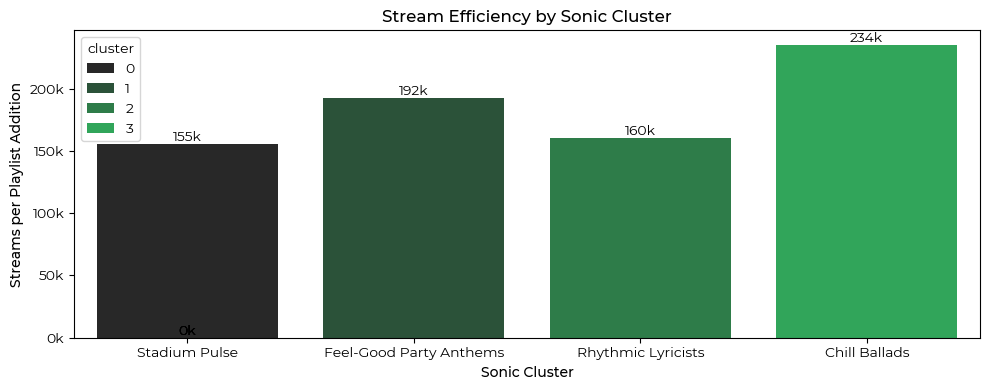

In [47]:
from matplotlib.ticker import FuncFormatter

plt.figure(figsize=(10, 4))
ax = sns.barplot(data=df_efficiency, x='cluster', y='efficiency', palette=spotify_cmap, hue='cluster', errorbar=None)
for p in ax.patches: 
    height = p.get_height() 
    ax.text(p.get_x() + p.get_width() / 2, height, f'{int(height/1000)}k', ha='center', va='bottom')
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x/1000)}k'))
xticks = ax.get_xticks()
ax.set_xticks(xticks)
ax.set_xticklabels(cluster_labels)
plt.title("Stream Efficiency by Sonic Cluster", fontweight='medium')
plt.ylabel("Streams per Playlist Addition", fontweight='medium')
plt.xlabel("Sonic Cluster", fontweight='medium')
plt.tight_layout()
plt.show()

For a streaming platform like Spotify, the goal isn't just to maximize stream counts, but also to maximize lifetime value per user. The findings from this project suggest that Cluster 3 tracks are the most efficient in terms of streams-to-playlist ratio, and prioritizing these profiles in personalized recommendations may lead to higher user retention compared to clusters that rely on being in more playlists to maintain stream velocity/volume.

If Spotify puts a "standard hit" in every playlist, it becomes like a radio station, which works, but it doesn't make the user feel like Spotify "knows" them (which is why many radio stations have sections for song requests to make users/listeners feel more heard & connected with the platform). When a user discovers a Cluster 3 song through personalized recommendation e.g. *Discover*, they feel like they connect with it. This emotional connection can lead to better user retention, where users don't unsubscribe from the service because they don't want to lose the library of songs they've bonded with.

Additionally, scattering (pushing) a song into many playlists to see if it "sticks" is wasteful and not operationally efficient because you're showing the song to people who might not be interested, which can lead to users getting annoyed and skipping tracks. By identifying tracks that fall in the Cluster 3 profile, Spotify can better allocate resources, achieving the same number of streams with fewer playlist inserts, freeing up playlist slots for other artists, hence making the platform more diverse and increasing its value proposition to smaller, "up and coming" creators (bringing in more of these creators onto the platform to help them grow as a creator/musician/podcaster).